In [1]:
# importing needed packages for the data cleaning

import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the data

df01 = pd.read_csv('/Users/hs/Documents/Anaconda_Python_code/SD_BootCamp/LR_project/final/Data/east.csv')
df02 = pd.read_csv('/Users/hs/Documents/Anaconda_Python_code/SD_BootCamp/LR_project/final/Data/north.csv')
df03 = pd.read_csv('/Users/hs/Documents/Anaconda_Python_code/SD_BootCamp/LR_project/final/Data/west.csv')

In [3]:
# marge the data

df = pd.concat([df01, df02,df03], axis=0, ignore_index=True)

In [4]:
df

,District,Category,Bedrooms,Livingrooms,Bathrooms,Floor_number,Property_age,Furnished,Kitechen,Garage,Elevator,AC,Price,Region
0,شقة للإيجار في شارع الامير سعود بن عبدالله بن ...,عوائل,3.0,1.0,2,علوي,جديد,NaN,yes,NaN,NaN,yes,"48,000",East
1,شقة للإيجار في شارع الشيخ عبدالله المخضوب ، حي...,عوائل,3.0,1.0,2,علوي,NaN,NaN,yes,NaN,yes,yes,"30,000",East
2,شقة للإيجار في شارع قلعة صلاح الدين ، حي العقي...,عوائل,2.0,1.0,1,أرضي,جديد,NaN,yes,NaN,yes,yes,"46,000",East
3,شقة للإيجار في شارع محمد بن عبدالعزيز الدغيثر ...,عوائل,1.0,1.0,علوي,10 سنة,NaN,NaN,NaN,NaN,yes,yes,"2,300",East
4,شقة للإيجار في طريق الملك فهد ، حي الملقا ، ال...,عوائل,2.0,2.0,2,3,4 سنة,yes,yes,NaN,yes,yes,"14,000",East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,شقة للإيجار في حي ، شارع محمد بن سليمان ، حي ا...,عوائل,3.0,1.0,2,علوي,10 سنة,NaN,yes,NaN,NaN,NaN,"16,000",West
1706,شقة للإيجار في شارع المجد ، حي ظهرة لبن ، الري...,عوائل,5.0,1.0,3,علوي,NaN,yes,yes,NaN,NaN,NaN,"25,000",West
1707,شقة للإيجار في شارع الفريح ، حي ظهرة لبن ، الر...,عوائل,4.0,1.0,2,علوي,8 سنة,NaN,NaN,NaN,NaN,NaN,"22,000",West
1708,شقة للإيجار في شارع راجح بن مزروع ، حي السويدي...,عوائل,4.0,1.0,2,علوي,22 سنة,NaN,NaN,NaN,NaN,NaN,"20,000",West


In [4]:
# explore the data content
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    return summary

In [5]:
resumetable(df)

Dataset Shape: (1710, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,District,object,0,859,شقة للإيجار في شارع الامير سعود بن عبدالله بن ...,شقة للإيجار في شارع الشيخ عبدالله المخضوب ، حي...,شقة للإيجار في شارع قلعة صلاح الدين ، حي العقي...
1,Category,object,4,2,عوائل,عوائل,عوائل
2,Bedrooms,float64,4,7,3.0,3.0,2.0
3,Livingrooms,float64,4,5,1.0,1.0,1.0
4,Bathrooms,object,19,8,2,2,1
5,Floor_number,object,127,25,علوي,علوي,أرضي
6,Property_age,object,509,26,جديد,NaN,جديد
7,Furnished,object,1609,1,NaN,NaN,NaN
8,Kitechen,object,283,1,yes,yes,yes
9,Garage,object,1580,1,NaN,NaN,NaN


### Visualize NaN values in the dataset

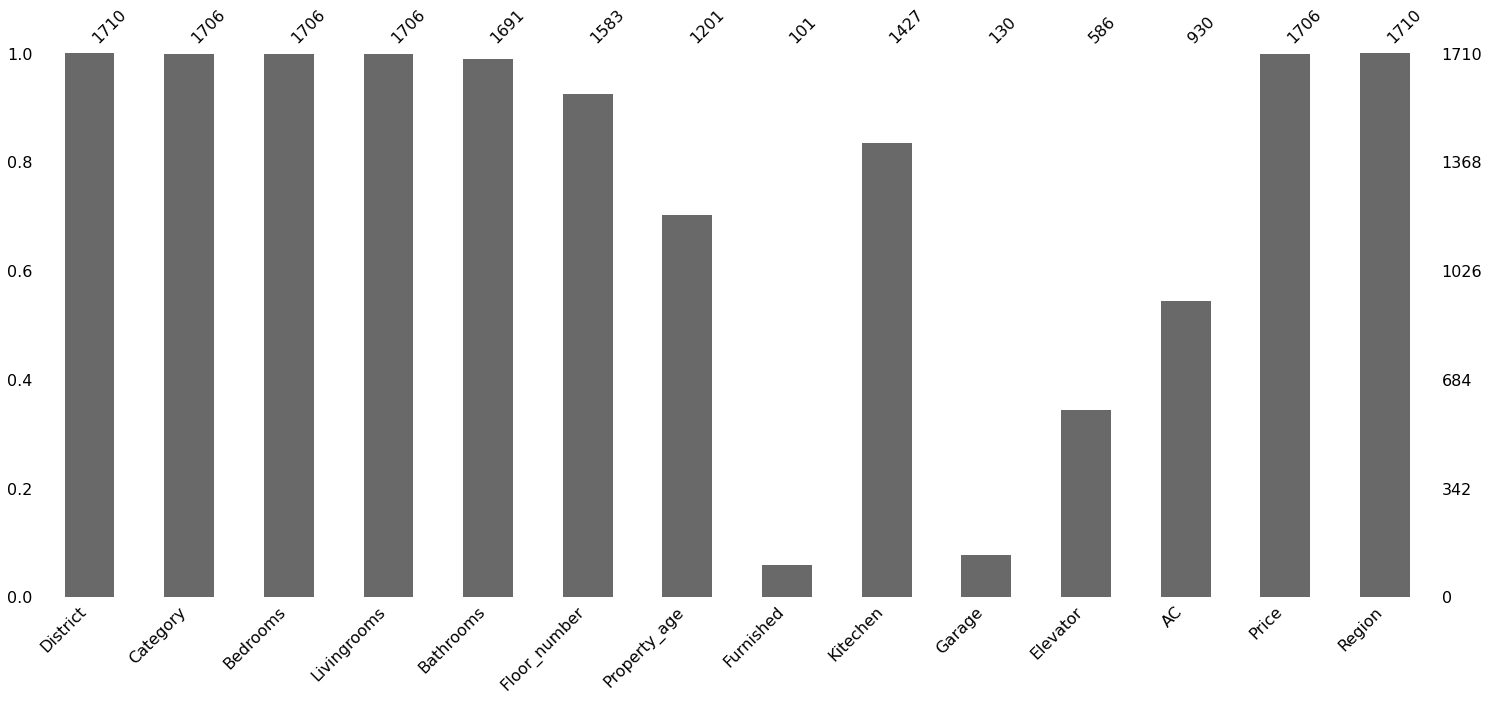

In [6]:
msno.bar(df);

### Replace Category column from Arabic to English

In [7]:
df['Category'].value_counts()

عوائل    1604
عزاب      102
Name: Category, dtype: int64

In [8]:
df = df.replace(['عوائل'],'family')
df = df.replace(['عزاب'],'singal')

### handling the NaN values:
* Dropping the significant NaN.
* Filling some features based on mean or most freq values in the column it self.
* Filling some features based on option availabilities. 


In [9]:
#In my case, price, bedrooms, and bathrooms columns consider as significant values
remove_nan = df.dropna(subset=['Price', 'Bathrooms', 'Bedrooms'])

In [10]:
remove_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1709
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      1691 non-null   object 
 1   Category      1691 non-null   object 
 2   Bedrooms      1691 non-null   float64
 3   Livingrooms   1691 non-null   float64
 4   Bathrooms     1691 non-null   object 
 5   Floor_number  1583 non-null   object 
 6   Property_age  1201 non-null   object 
 7   Furnished     101 non-null    object 
 8   Kitechen      1412 non-null   object 
 9   Garage        129 non-null    object 
 10  Elevator      582 non-null    object 
 11  AC            920 non-null    object 
 12  Price         1691 non-null   object 
 13  Region        1691 non-null   object 
dtypes: float64(2), object(12)
memory usage: 198.2+ KB


### Discovering the Floor_number column values and then choosing the best way,
### to handle nan values by filling or dropping in a proper way.

In [11]:
floors = remove_nan
floors.Floor_number.value_counts()

علوي      796
3         369
أرضي      292
جديد       37
4 سنة      13
3 سنة      10
10 سنة      7
20          7
6 سنة       6
8 سنة       6
5 سنة       5
4           5
2 سنة       4
30 سنة      4
15 سنة      4
7 سنة       4
9 سنة       3
16          2
20 سنة      2
11 سنة      2
9           1
19          1
18 سنة      1
22 سنة      1
5           1
Name: Floor_number, dtype: int64

In [16]:
# Dropping abnormal values

# iterate through Floor_number data, and then remove str content corrlated with number 
for floor in range(31):
    try:
        flist = floors[ (floors.Floor_number == f'{floor} سنة') ].index
        floors = floors.drop(flist)
    except:
        print(f'floor number {floor}, does not exist')

f = floors[(floors.Floor_number == 'جديد')].index
floors = floors.drop(f)

floors.Floor_number.value_counts()

2     796
3     369
1     292
20      7
4       5
16      2
9       1
19      1
5       1
Name: Floor_number, dtype: int64

In [17]:
# Replace some values with propr number

floors = floors.replace(['علوي'],'2')
floors = floors.replace(['أرضي'],'1')
floors['Floor_number'].value_counts()

2     796
3     369
1     292
20      7
4       5
16      2
9       1
19      1
5       1
Name: Floor_number, dtype: int64

In [19]:
floors["Floor_number"].value_counts()

2     796
3     369
1     292
20      7
4       5
16      2
9       1
19      1
5       1
Name: Floor_number, dtype: int64

<AxesSubplot:>

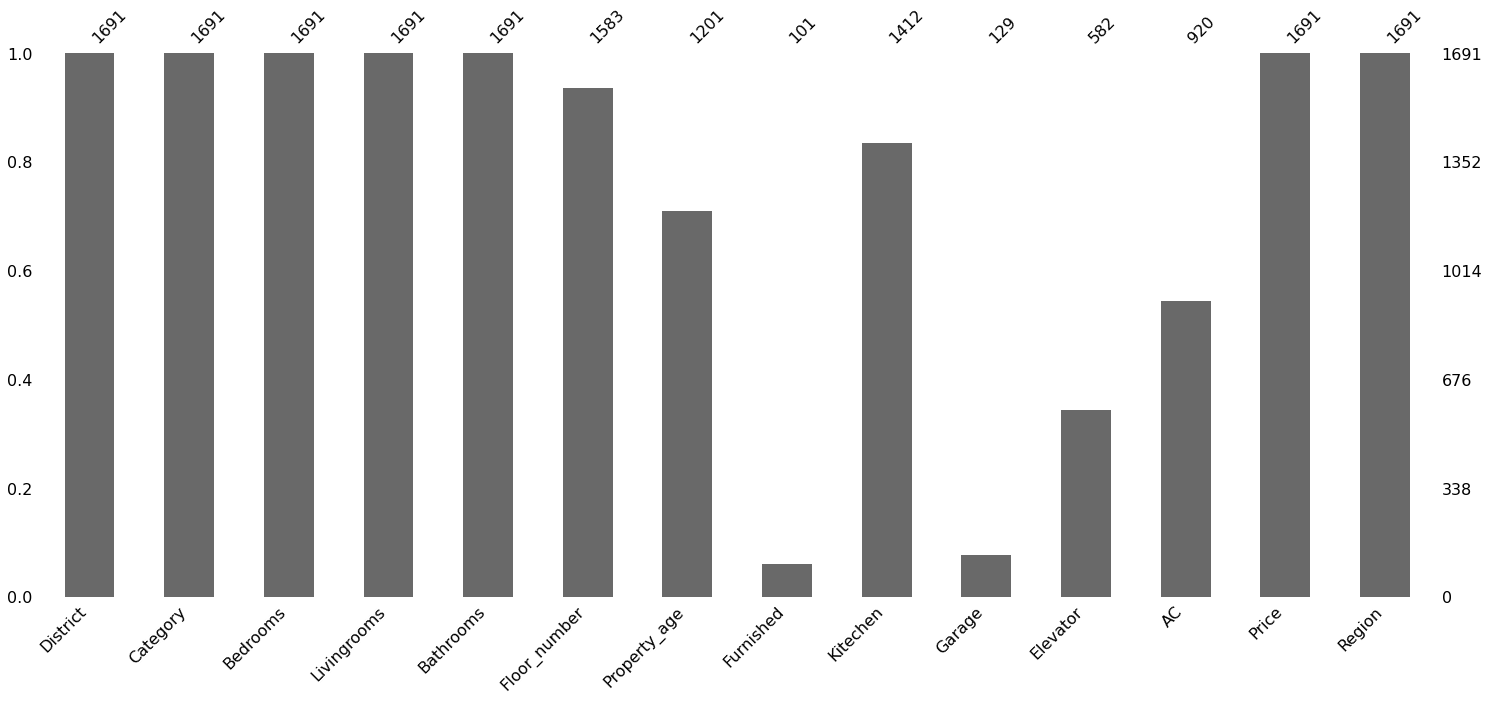

In [13]:
msno.bar(floors);

In [17]:
# print(floors['Floor_number'].value_counts().isnull())

In [18]:
# convert the Floor_number column data type to numerical and marge the same values of floor number
print(floors['Floor_number'].dtype)

object


In [20]:
# Strip Floor_number column
floors['floor_num'] = floors['Floor_number'].str.strip()

# Convert Floor_number to float
floors['floor_number'] = floors['floor_num'].astype(float)
floors['floor_number'] = floors['floor_number'].fillna(1)
# Write an assert statement making sure of conversion
assert floors['floor_number'].dtype == 'float'

# Print formed columns and calculate average Floor_number 
print(floors[['Floor_number', 'floor_num', 'floor_number']])
print(floors['floor_number'].mean())

     Floor_number floor_num  floor_number
0               2         2           2.0
1               2         2           2.0
2               1         1           1.0
4               3         3           3.0
5               1         1           1.0
...           ...       ...           ...
1705            2         2           2.0
1706            2         2           2.0
1707            2         2           2.0
1708            2         2           2.0
1709            2         2           2.0

[1582 rows x 3 columns]
2.1011378002528445


In [21]:
print(floors['Floor_number'].dtype)
print(floors['floor_num'].dtype)
print(floors['floor_number'].dtype)

object
object
float64


In [22]:
floors['floor_number'].value_counts()

2.0     796
1.0     400
3.0     369
20.0      7
4.0       5
16.0      2
9.0       1
19.0      1
5.0       1
Name: floor_number, dtype: int64

**Awesome Floor_number column cleaned :)**

### Discovering the Property_age column values and then choosing the best way,
### to handle nan values by filling or dropping in a proper way.

In [23]:
age = floors

In [24]:
age.Property_age.value_counts()

جديد      601
2 سنة      94
3 سنة      89
4 سنة      73
5 سنة      69
6 سنة      56
10 سنة     42
8 سنة      41
7 سنة      32
9 سنة      22
20 سنة     15
15 سنة     13
12 سنة      8
11 سنة      8
30 سنة      7
19 سنة      5
22 سنة      5
13 سنة      5
18 سنة      4
17 سنة      3
25 سنة      3
24 سنة      2
16 سنة      1
36 سنة      1
14 سنة      1
26 سنة      1
Name: Property_age, dtype: int64

In [25]:
# Replace some values with propr number

age['Property_age'] = age['Property_age'].replace(['جديد'],'1')
age.Property_age.value_counts()

1         601
2 سنة      94
3 سنة      89
4 سنة      73
5 سنة      69
6 سنة      56
10 سنة     42
8 سنة      41
7 سنة      32
9 سنة      22
20 سنة     15
15 سنة     13
12 سنة      8
11 سنة      8
30 سنة      7
19 سنة      5
22 سنة      5
13 سنة      5
18 سنة      4
17 سنة      3
25 سنة      3
24 سنة      2
16 سنة      1
36 سنة      1
14 سنة      1
26 سنة      1
Name: Property_age, dtype: int64

In [26]:
# iterate through Property_age data, and then remove str content corrlated with number 
for ages in range(40):
    try:
        age['Property_age'] = age['Property_age'].replace([f'{ages} سنة'],f'{ages}')
    except:
        print(f'Property age you looking for {ages}, does not exist')


age.Property_age.value_counts()

1     601
2      94
3      89
4      73
5      69
6      56
10     42
8      41
7      32
9      22
20     15
15     13
12      8
11      8
30      7
19      5
22      5
13      5
18      4
17      3
25      3
24      2
16      1
36      1
14      1
26      1
Name: Property_age, dtype: int64

In [26]:
# age['Property_age'] = age['Property_age'].fillna(4)
# age['Property_age'].value_counts()

In [27]:
# convert the Property_age column data type to numerical
print(age['Property_age'].dtype)

object


In [28]:
# Strip Property_age column
age['property_age'] = age['Property_age'].str.strip('')

# Convert Property_age to float
age['AGE'] = age['property_age'].astype(float)
age['AGE'] = age['AGE'].fillna(4)
# Write an assert statement making sure of conversion
assert age['AGE'].dtype == 'float'

# Print formed columns and calculate average Property_age 
print(age[['Property_age', 'property_age', 'AGE']])
print(age['AGE'].mean())

     Property_age property_age   AGE
0               1            1   1.0
1             NaN          NaN   4.0
2               1            1   1.0
4               4            4   4.0
5               1            1   1.0
...           ...          ...   ...
1705           10           10  10.0
1706          NaN          NaN   4.0
1707            8            8   8.0
1708           22           22  22.0
1709            4            4   4.0

[1582 rows x 3 columns]
3.93173198482933


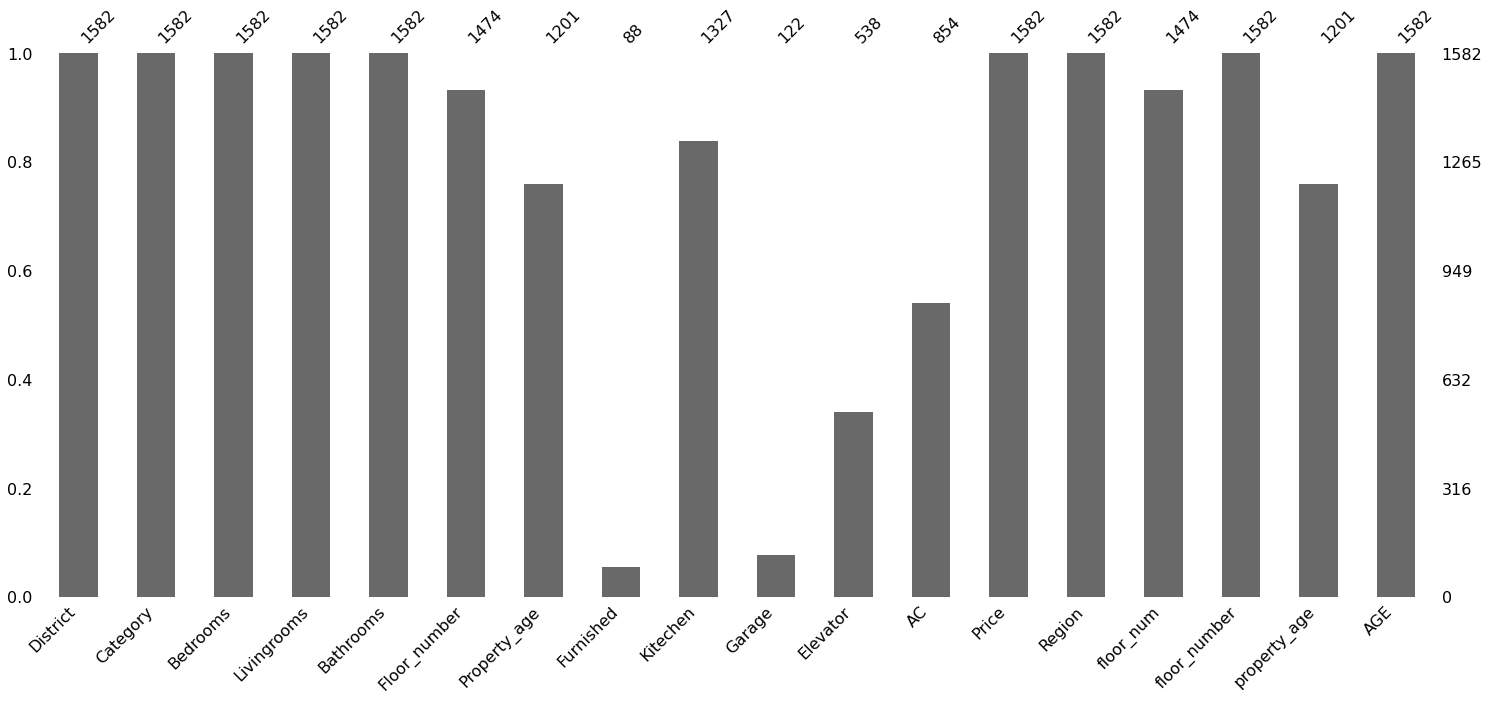

In [29]:
msno.bar(age);

### Filling Furnished, Kitchen, Garage, Elevator,and AC features based on option availabilities. 

In [29]:
options = age

In [30]:
options.columns

Index(['District', 'Category', 'Bedrooms', 'Livingrooms', 'Bathrooms',
       'Floor_number', 'Property_age', 'Furnished', 'Kitechen', 'Garage',
       'Elevator', 'AC', 'Price', 'Region', 'floor_num', 'floor_number',
       'property_age', 'AGE'],
      dtype='object')

In [31]:
# filling nan values in availabilities featers with "no" 
options['Furnished'].fillna('no', inplace = True)
options['Kitechen'].fillna('no', inplace = True)
options['Garage'].fillna('no', inplace = True)
options['Elevator'].fillna('no', inplace = True)
options['AC'].fillna('no', inplace = True)

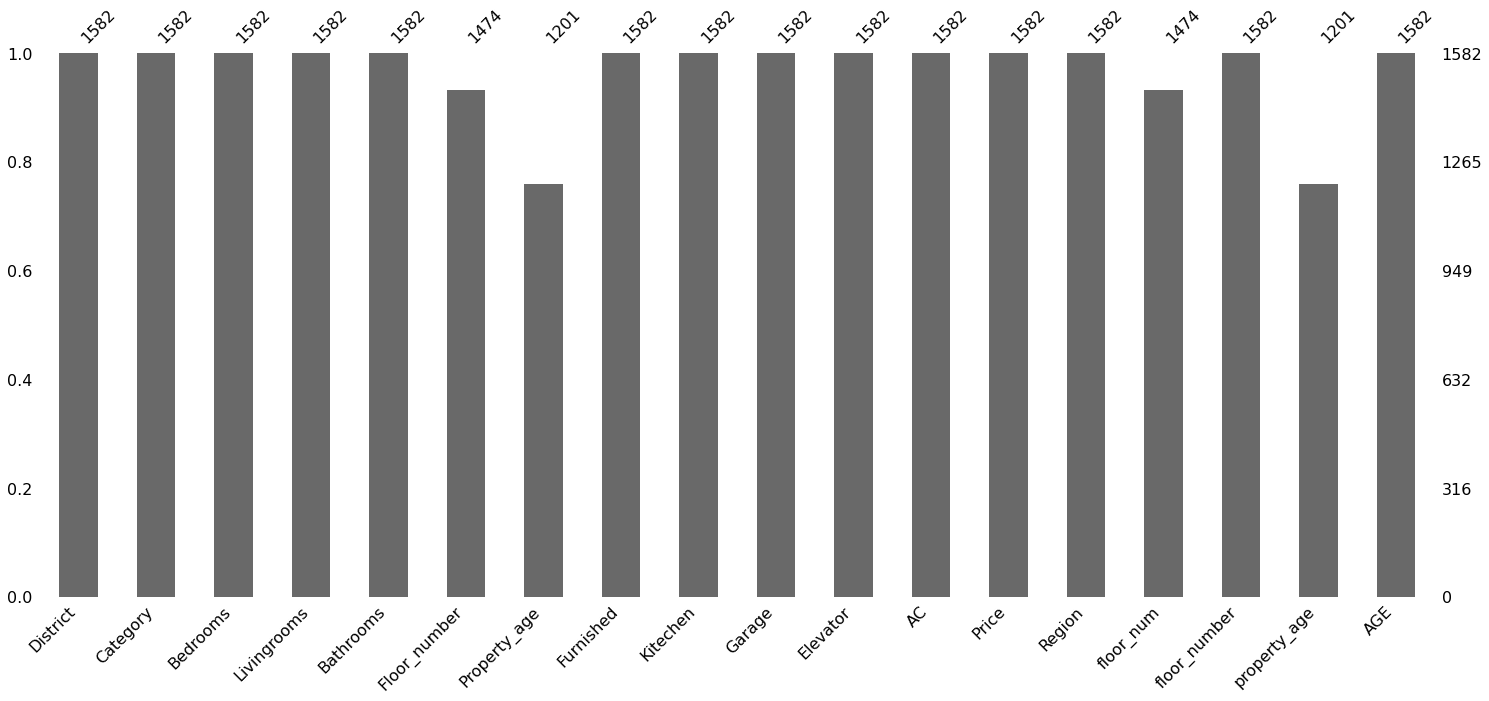

In [33]:
msno.bar(age);

### Convert Price column to float, and drop abnormal values

In [32]:
price = options

In [33]:
price['Price'].value_counts()

35,000     113
20,000      74
25,000      70
30,000      69
45,000      65
          ... 
69,000       1
1,800        1
250,000      1
25,300       1
22,500       1
Name: Price, Length: 129, dtype: int64

In [34]:
# remove ( , ) from price value
price['Price'] = price['Price'].str.replace(",","")

In [35]:
# convert Price column to float
price['Price'] = price['Price'].astype(float)

In [36]:
price.Price.describe()

count      1582.000000
mean      37408.468394
std       26752.448796
min         400.000000
25%       20000.000000
50%       31500.000000
75%       45000.000000
max      300000.000000
Name: Price, dtype: float64

In [43]:
# drop values less than 12k, because there are no apartments rented for 1 year with 12k
price = price.loc[(price["Price"]  > 12000.0)]

In [45]:
price.Price.describe()

count      1510.000000
mean      38891.556291
std       26466.550339
min       12500.000000
25%       21000.000000
50%       33000.000000
75%       45000.000000
max      300000.000000
Name: Price, dtype: float64

In [66]:
price.columns

Index(['District', 'Category', 'Bedrooms', 'Livingrooms', 'Bathrooms',
       'Floor_number', 'Property_age', 'Furnished', 'Kitechen', 'Garage',
       'Elevator', 'AC', 'Price', 'Region', 'floor_num', 'floor_number',
       'property_age', 'AGE'],
      dtype='object')

In [64]:
cleaned = price.loc[: ,['District', 'Category', 'Bedrooms', 'Livingrooms', 'Bathrooms', 'Furnished', 'Kitechen', 'Garage',
       'Elevator', 'AC', 'Price', 'Region', 'floor_number', 'AGE']].reset_index()

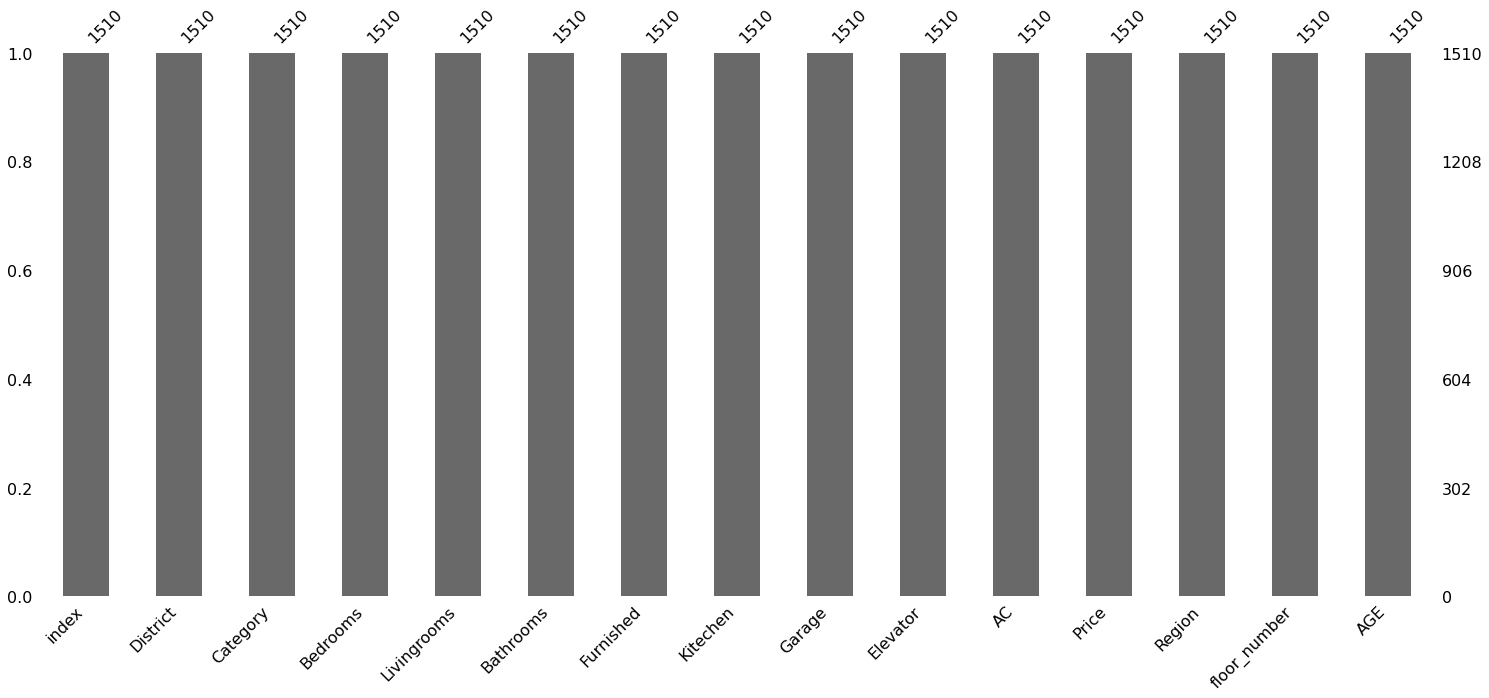

In [65]:
msno.bar(cleaned);

### Finally, data has been cleaned!

In [68]:
# data shape before cleaning
df.shape

(1710, 14)

In [57]:
# data shape after cleaning
price.shape

(1510, 18)

In [67]:
# data shape after extracting the needed features
cleaned.shape

(1510, 15)

### Last step, save cleaned data

In [56]:
cleaned.to_csv("aqar_cleaned.csv", index=False, encoding='utf-8-sig')